In [72]:
from utilities import *
import matplotlib.pyplot as plt
import numpy as np

In [73]:
X_train, y_train, X_test, y_test = load_data()

In [74]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


In [75]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


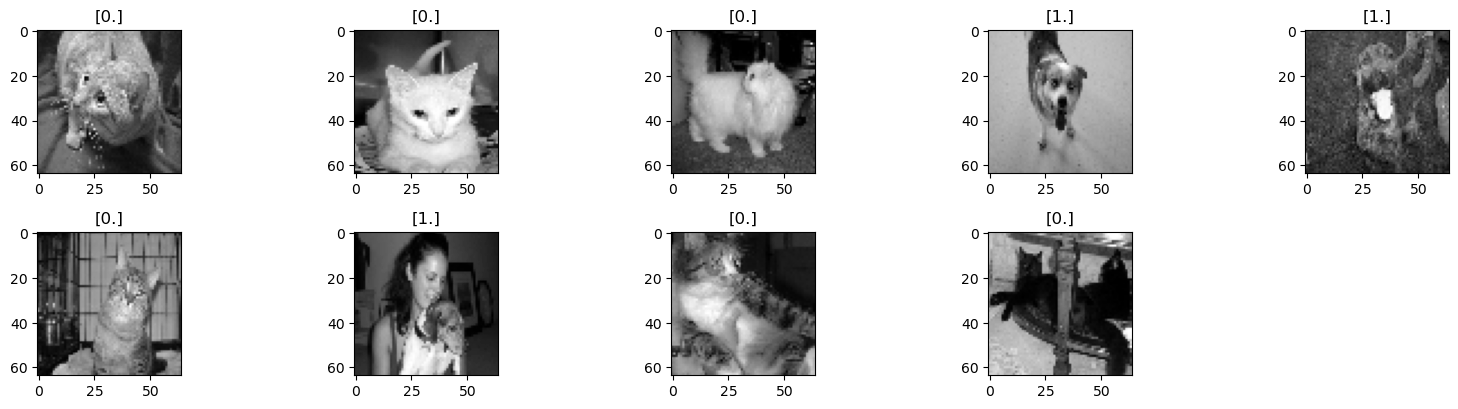

In [76]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

In [77]:
# TO DO
# 1. Normaliser le train_set et le test_set (0-255 -> 0-1)
# 2. flatten() les variables du train_set et du test_set (64x64 -> 4096)
# 3. Entrainer le modele sur le train_set (tracer la courbe d'apprentissage, trouver les bons hyper-params)
# (si vous rencontrez un probleme avec le log_loss, utiliser la fonction de sklearn a la place !)
# 4. Évaluer le modele sur le test_set (tracer également la courbe de Loss pour le test_set)
# 5. Partager vos conclusions dans les commentaires !

In [78]:
X_train = X_train/255
X_test = X_test/255

In [79]:
def flatten_data(X):
    # Aplatir les données
    X_flattened = X.reshape(X.shape[0], -1)
    return X_flattened

X_train = flatten_data(X_train)
X_test = flatten_data(X_test)

In [80]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [81]:
from scipy.special import expit
# Utile pour Optuna (plus stable numériquement, évite les débordements par valeur trop grande/ trop petite)

def model(X, W, b):
    Z = X.dot(W) + b
    A = expit(Z)
    return A

In [82]:
# def log_loss(A, y):
#     return (-1) / len(y) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
# ne fonctionne pas en effet !

In [83]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)

In [84]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

In [85]:
def predict(X, W, b):
    A = model(X, W, b)
    # print(A)
    return A >= 0.5

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from tqdm import tqdm

In [98]:
def artificial_neuron(X_train, y_train, X_test, y_test, learning_rate = 0.001, n_iter = 2000):
    # initialisation W, b
    W, b = initialisation(X_train)

    train_loss = []
    test_loss = []
    train_acc = []
    test_acc = []

    for i in range(n_iter):
        A = model(X_train, W, b)

        if i % 10 == 0 :
            train_loss.append(log_loss(y_train, A))
            y_pred = predict(X_train, W, b)
            train_acc.append(accuracy_score(y_train, y_pred))

            A_test = model(X_test, W, b)
            test_loss.append(log_loss(y_test, A_test))
            y_pred_test = predict(X_test, W, b)
            test_acc.append(accuracy_score(y_test, y_pred_test))

        dW, db = gradients(A, X_train, y_train)
        W, b = update(dW, db, W, b, learning_rate)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss, label='train loss')
    plt.plot(test_loss, label='test loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(train_acc, label='train acc')
    plt.plot(test_acc, label='test_acc')
    plt.legend()
    plt.show()

    return (W, b)

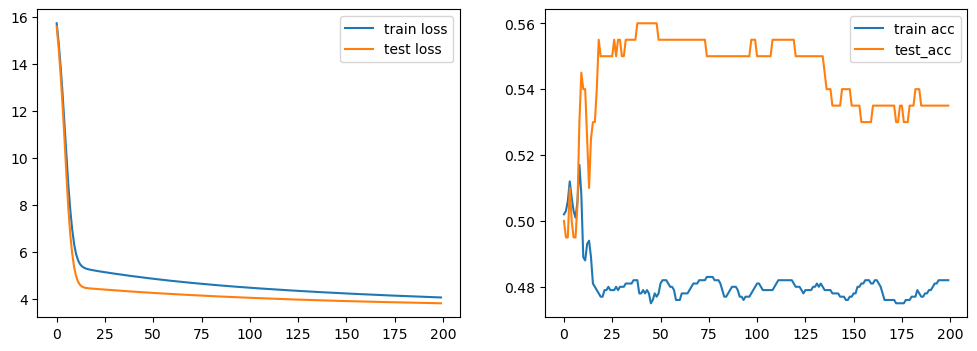

In [99]:
W, b = artificial_neuron(X_train, y_train, X_test, y_test)

In [97]:
def artificial_neuron(X, y, learning_rate = 0.01, n_iter = 2000):
    # initialisation W, b
    W, b = initialisation(X)

    Loss = []

    for i in range(n_iter):
        A = model(X, W, b)

        if i % 10 == 0 :
            Loss.append(log_loss(y, A))
            y_pred = predict(X, W, b)
            accuracy = accuracy_score(y, y_pred)

        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)


    return (W, b, Loss, accuracy)

[I 2025-01-12 15:00:58,554] A new study created in memory with name: no-name-ace84206-0321-468f-9b9d-93f695d1c6a6


(1000, 1)
(1000, 1)


[I 2025-01-12 15:01:08,847] Trial 0 finished with value: 0.544 and parameters: {'learning_rate': 0.051534271287673385, 'n_iter': 631}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:01:19,221] Trial 1 finished with value: 0.538 and parameters: {'learning_rate': 0.029785002142884043, 'n_iter': 708}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:01:31,001] Trial 2 finished with value: 0.532 and parameters: {'learning_rate': 0.16058010999777067, 'n_iter': 994}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:01:40,755] Trial 3 finished with value: 0.532 and parameters: {'learning_rate': 0.005820333794630112, 'n_iter': 720}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:01:50,961] Trial 4 finished with value: 0.539 and parameters: {'learning_rate': 0.16897313720510626, 'n_iter': 884}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:01,285] Trial 5 finished with value: 0.543 and parameters: {'learning_rate': 0.002088654673721568, 'n_iter': 846}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:11,362] Trial 6 finished with value: 0.534 and parameters: {'learning_rate': 0.052845450818036675, 'n_iter': 936}. Best is trial 0 with value: 0.544.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:21,105] Trial 7 finished with value: 0.549 and parameters: {'learning_rate': 0.009703171023581567, 'n_iter': 868}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:29,208] Trial 8 finished with value: 0.526 and parameters: {'learning_rate': 0.008956937968626039, 'n_iter': 656}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:40,204] Trial 9 finished with value: 0.537 and parameters: {'learning_rate': 0.19665328257173725, 'n_iter': 708}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:49,745] Trial 10 finished with value: 0.53 and parameters: {'learning_rate': 0.10000238741914164, 'n_iter': 560}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:02:58,068] Trial 11 finished with value: 0.538 and parameters: {'learning_rate': 0.0709335557102036, 'n_iter': 576}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:07,247] Trial 12 finished with value: 0.517 and parameters: {'learning_rate': 0.06328439945204525, 'n_iter': 810}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:16,625] Trial 13 finished with value: 0.544 and parameters: {'learning_rate': 0.10027915485854866, 'n_iter': 787}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:24,501] Trial 14 finished with value: 0.538 and parameters: {'learning_rate': 0.03712079109730533, 'n_iter': 628}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:31,518] Trial 15 finished with value: 0.528 and parameters: {'learning_rate': 0.08589114997223957, 'n_iter': 510}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:41,085] Trial 16 finished with value: 0.535 and parameters: {'learning_rate': 0.12510820667038955, 'n_iter': 903}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:50,582] Trial 17 finished with value: 0.532 and parameters: {'learning_rate': 0.03204631162030176, 'n_iter': 773}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:03:58,440] Trial 18 finished with value: 0.527 and parameters: {'learning_rate': 0.04965629768963114, 'n_iter': 640}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)


[I 2025-01-12 15:04:08,136] Trial 19 finished with value: 0.543 and parameters: {'learning_rate': 0.030390949544472308, 'n_iter': 843}. Best is trial 7 with value: 0.549.


(1000, 1)
(1000, 1)
Best hyperparameters: {'learning_rate': 0.009703171023581567, 'n_iter': 868}
(1000, 1)
(1000, 1)


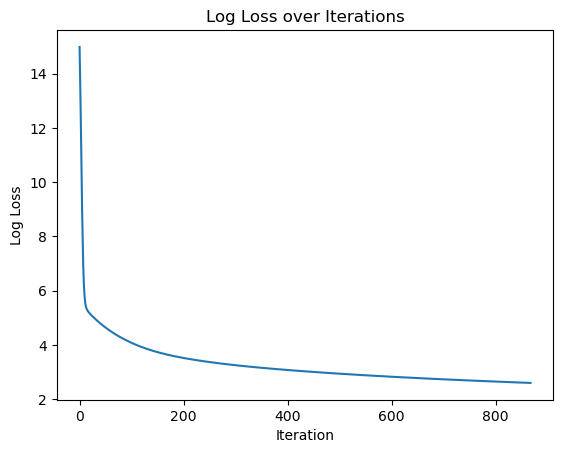

Final Accuracy: 0.548


In [69]:
import optuna

def objective(trial):
    # Définir les hyperparamètres à optimiser
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.2)
    n_iter = trial.suggest_int('n_iter', 500, 1000)

    # Créer le modèle avec les hyperparamètres suggérés
    model = artificial_neuron(X_train, y_train,
        learning_rate=learning_rate,
        n_iter=n_iter,
    )

    W, b, Loss, accuracy = artificial_neuron(X_train, y_train)
    return accuracy

# Créer une étude Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)

# Afficher les meilleurs hyperparamètres trouvés
print("Best hyperparameters:", study.best_params)

# Utiliser les meilleurs hyperparamètres pour entraîner le modèle final
best_params = study.best_params

W_final, b_final, Loss_final, accuracy_final = artificial_neuron(X_train, y_train, learning_rate=best_params['learning_rate'], n_iter=best_params['n_iter'])

# Afficher la courbe de perte
plt.plot(Loss_final)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.show()

# Afficher l'accuracy finale
print(f"Final Accuracy: {accuracy_final}")

In [96]:
W_final, b_final, Loss_final, accuracy_final = artificial_neuron(X_train, y_train, learning_rate=0.001, n_iter=2000)

TypeError: artificial_neuron() missing 2 required positional arguments: 'X_test' and 'y_test'

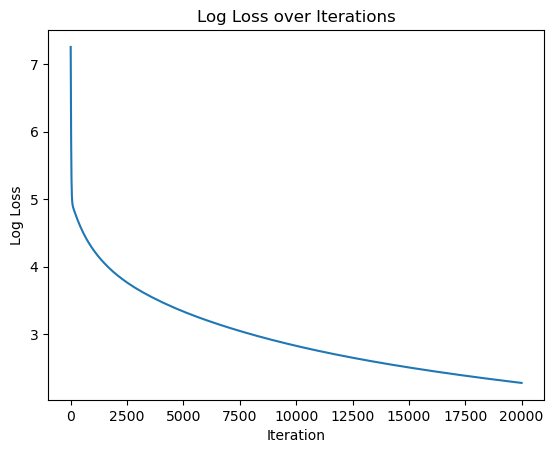

0.495


In [71]:
y_pred = predict (X_test, W_final, b_final)
accuracy = accuracy_score(y_test, y_pred)

plt.plot(Loss_final)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.show()

print(accuracy)
